# More Image Processing Options: Cellpose and Denoising

Be sure to have gone through the main ImageProcessing notebook in PalmettoBUG before executing this one! This notebook depends on the directory being set up from there.

No other notebooks depend on this one -- but outputs from this notebook (like cellpose masks in the /masks/cellpose folder) could be inserted into those other notebooks to replace corresponding default inputs in other notebooks (such as deepcell masks).

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile as tf

import isosegdenoise as iSD

### CHANGE The following directory to match an existing directory on your computer if you are testing this tutorial on your own machine!

In [2]:
my_computer_path =  "C:/Users/Default/Desktop" 

## Load into isosegdenoise:

NOTE!: This notebook depends on the CORE_mcd_to_analysis notebook to have already been run / the example palmettobug project must already be setup in the project_directory! 
        The isosegdenoise package cannot setup its own example data project (nor is the example data bundled with it), instead that must be done manually or through palmettobug. 

In [3]:
## initialize denoise / esgmentation experiment:
project_directory = f"{my_computer_path}/Example_IMC"
resolutions = [1.0, 1.0]    ## in micrometers. 1 micron is standard IMC resolution
iSD_object = iSD.imc_entrypoint(directory = project_directory, resolutions = resolutions, from_mcds = True)

In [4]:
iSD_object.panel

,channel,name,keep,segmentation
0,I127,127I,0,NaN
1,Xe131,131Xe,0,NaN
2,Ba132,132Ba,0,NaN
3,Ba138,138Ba,0,NaN
4,Pr141,aSMA,1,NaN
5,Nd142,p-selectin,1,NaN
6,Nd143,Vimentin,1,NaN
7,Nd144,CD14,1,NaN
8,Nd145,CD31,1,NaN
9,Nd146,CD16,1,NaN


## Cellpose Denoising

If you have a gpu configured in this environment, try setting gpu = True when calling the cellpose_segment method

In [5]:
'''
Set the parameters for a Cellpose denoising!
'''
model_options = ['denoise_cyto3', 'deblur_cyto3', 'upsample_cyto3', 'denoise_nuclei', 'deblur_nuclei', 'upsample_nuclei']
model = model_options[0]

channel_list = [19, 23]      #### either a list of integers, with the integer corresponding to the layer of the image to denoise, or ["all"] to denoise all channels
                        ## here we denoise GFAP (21) and NeuN (20). See the index of experiment.panel[experiment.panel['keep'] == 1].reset_index().drop('index', axis = 1) file for the integer :: channel correspondence
                        ## This means that the numbers DO NOT match the original panel file! On the other hand, they do match the channel number if the image is opened in napari

image_folder = iSD_object.directory_object.img_dir + "/img"
output_directory = iSD_object.directory_object.img_dir + "/denoised_Collagen_Vitronectin"
img = ""   ## Empty string runs all images in image_folder

## specify img (a string of the filename -- not file path! -- of the image to only denoise that one image. This can be  useful as a test
            ## use os.listdir(image_folder) to retrieve a list of the possible values for img

img = os.listdir(image_folder)[0]   # Run 1 image

In [6]:
iSD_object.cellpose_denoise(gpu = False, model_type = model, diam_mean = 50.0, channel_list = channel_list, 
                               image_folder = image_folder, output_folder = output_directory, 
                               img = img)   

CRC_1_ROI_001.ome.tiff denoising has been completed!


## Cellpose Segmentation

If you have a gpu configured in this environment, try setting gpu = True when calling the cellpose_segment method

In [7]:
'''
Example of cellpose segmentation:
'''
image_folder = iSD_object.directory_object.img_dir + "/img"
output_folder = iSD_object.directory_object.masks_dir + "/cellpose"
img = ""   ## as with the cellpose denoising, specify a file name (not file path) to only segment one image in the image_folder
            ## an empty string, as here, denoises all files in image_folder

model_options = ["cyto3", "nuclei", "cyto2_cp3", "tissuenet_cp3", "livecell_cp3", "yeast_PhC_cp3",
                              "yeast_BF_cp3", "bact_phase_cp3", "bact_fluor_cp3", "deepbacs_cp3", "cyto2", "cyto",
                              "transformer_cp3", "neurips_cellpose_default", "neurips_cellpose_transformer",
                              "neurips_grayscale_cyto2"]
model_choice = "cyto3"

## diam_mean, flow_threshold, cellprob_threshold, and min_size are all arguments in the CellPose API --> see cellpose documentation for more details

iSD_object.cellpose_segment(gpu = False, 
                                model_type = model_choice, 
                                diam_mean = 50.0, image_folder = image_folder, 
                                output_folder = output_folder,
                                img = img, 
                                flow_threshold = 0.4, 
                                cellprob_threshold = 0.0, 
                                min_size = 15, 
                                re_do = True)

CRC_1_ROI_001.ome.tiff has been Segmented with 1022 masks in the image!
CRC_1_ROI_002.ome.tiff has been Segmented with 1237 masks in the image!
CRC_2_ROI_001.ome.tiff has been Segmented with 1419 masks in the image!
CRC_2_ROI_002.ome.tiff has been Segmented with 680 masks in the image!
CRC_2_ROI_003.ome.tiff has been Segmented with 639 masks in the image!
CRC_2_ROI_004.ome.tiff has been Segmented with 123 masks in the image!
CRC_3_ROI_001.ome.tiff has been Segmented with 1965 masks in the image!
CRC_3_ROI_002.ome.tiff has been Segmented with 2421 masks in the image!
CRC_3_ROI_003.ome.tiff has been Segmented with 562 masks in the image!
CRC_3_ROI_004.ome.tiff has been Segmented with 1706 masks in the image!


(<Figure size 988.8x604.8 with 2 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x24247709d20>)

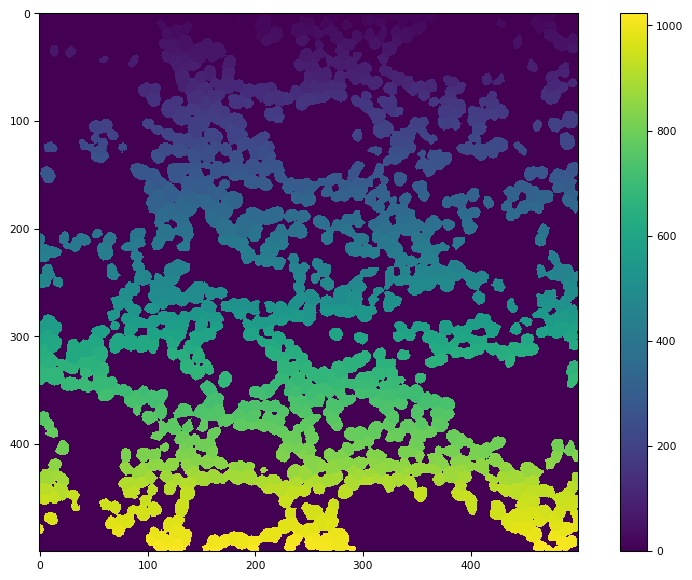

In [8]:
masks = os.listdir(output_folder)
tf.imshow(tf.imread(output_folder + "/" + masks[0]))

## Mask Expansion

In [9]:
'''
Example of mask expansion:
'''
distance = 5              ###3 number of pixles to expand by
image_folder = iSD_object.directory_object.masks_dir + "/cellpose"
output_folder = iSD_object.directory_object.masks_dir + "/cellpose_expanded_5"
iSD.mask_expand(distance, image_source = image_folder, output_directory = output_folder)

(<Figure size 988.8x604.8 with 2 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x24247b9df00>)

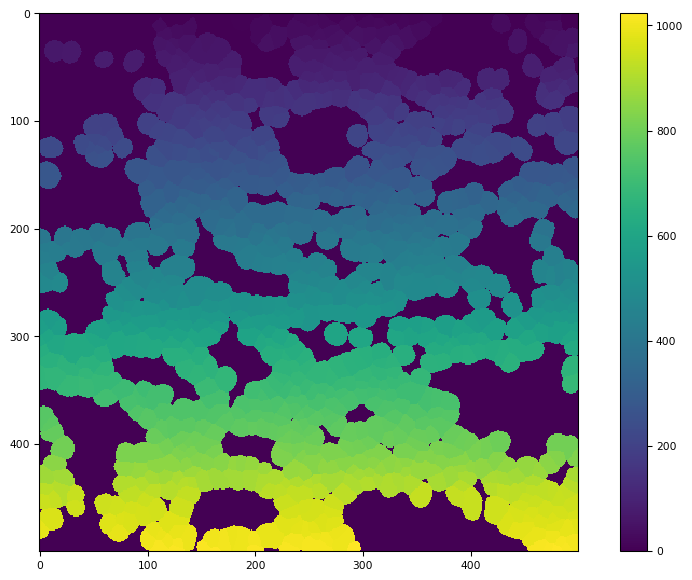

In [10]:
masks = os.listdir(output_folder)
tf.imshow(tf.imread(output_folder + "/" + masks[0]))

## 'Simple' Denoising

In [12]:
'''
Example of simple denoising:
'''
input_folder = iSD_object.directory_object.img_dir + "/img"
output_folder = iSD_object.directory_object.img_dir + "/simple_denoised_Collagen_Vitronectin"
channel_list = [23]
sigma_range = None     ## or a list of floats of sigmas to calibrate nl_means_denoising on ('best' sigma from j-invariate calibration then use for a finer-tuning calibration, whose output is finally used to denoise)
pre_cal = False        ## when False, the simple denoiser sigmas are calibrated on cal_img. If True, then assumes this has alreayd been done by Experiment.simple_denoise_executor.calibrate_on_img()
cal_img = 0            ## an integer, denoting which image in the dataset to do the initial calibraiton on. As in --> os.listdir(folder_path)[cal_img]

iSD_object.simple_denoise(input_folder, output_folder, channel_list, sigma_range = sigma_range, pre_cal = False, cal_img = 0)

C:/Users/Default/Desktop/Example_IMC/images/simple_denoised_Collagen_Vitronectin/CRC_1_ROI_001.ome.tiff denoising of channel 23 has been completed!
C:/Users/Default/Desktop/Example_IMC/images/simple_denoised_Collagen_Vitronectin/CRC_1_ROI_002.ome.tiff denoising of channel 23 has been completed!
C:/Users/Default/Desktop/Example_IMC/images/simple_denoised_Collagen_Vitronectin/CRC_2_ROI_001.ome.tiff denoising of channel 23 has been completed!
C:/Users/Default/Desktop/Example_IMC/images/simple_denoised_Collagen_Vitronectin/CRC_2_ROI_002.ome.tiff denoising of channel 23 has been completed!
C:/Users/Default/Desktop/Example_IMC/images/simple_denoised_Collagen_Vitronectin/CRC_2_ROI_003.ome.tiff denoising of channel 23 has been completed!
C:/Users/Default/Desktop/Example_IMC/images/simple_denoised_Collagen_Vitronectin/CRC_2_ROI_004.ome.tiff denoising of channel 23 has been completed!
C:/Users/Default/Desktop/Example_IMC/images/simple_denoised_Collagen_Vitronectin/CRC_3_ROI_001.ome.tiff denoisin